# Project 1: Wealth and Education
## Cleaning and Exploring Data with Pandas
## Due Date: 
## Collaboration Policy

Data science is a collaborative activity. While you may talk with others about
the project, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** at the top
of your notebook.


**Collaborators**: *list collaborators here*


## This Assignment

<img src="Data/03-15_SchoolMeal_Figure2_web.png" style="width:500px">

In recent years, the positively correlated and multifaceted relationship between educational attainment and wealth in the United States has been emphasized as one of the main causes of racial income gap and generational poverty. Nonetheless, despite numerous intervention efforts made by the government and the private sector, the extent of the problem has remained pervasive and convoluted to this day.

In this project, you will investigate data regarding student eligibility for free lunch and educational attainment for public schools in the state of California. Above is a map depicting shares of students eligible for Free and Reduced-Price Meal (FRPM) in California. The information have been made available by the California Department of Education. The main goal for this assignment is to understand the relationship between wealth and education. We will walk through various steps of exploratory data analysis to do this, and provide comments and insights along the way to give you a sense of how we arrive at each discovery and what next steps it leads to.

As we clean and explore these data, you will gain practice with:
* Reading simple csv files
* Working with data at different levels of granularity
* Identifying the type of data collected, missing values, anomalies, etc.
* Applying probability sampling techniques
* Exploring characteristics and distributions of individual variables

## Score Breakdown
Question | Points
--- | ---
1a | 1
Total | 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

---
## 1: Loading Public Schools Data

We have data, but we don't have any specific questions about the data yet, so let's focus on understanding the structure of the data. This involves answering questions such as:

* Is the data in a standard format or encoding?
* Is the data organized in records?
* What are the fields in each record?

### Question 1a: Reading in the Files

Based on the above information, let's attempt to load `pubschls.csv`, `frpm1819.csv`, and `sat18.csv` into pandas data frames with the following names: `sch`, `frpm`, and `sat` respectively.

In [3]:
sch = pd.read_csv('Data/pubschls.txt', sep="\t")
sch = sch.loc[sch['StatusType']=='Active']
sch = sch.replace('No Data', np.NaN)
frpm = pd.read_excel('Data/frpm1819.xlsx', 'FRPM School-Level Data ', header=1)
sat = pd.read_excel('Data/sat18.xls')

Now that you've read in the files, let's try some `pd.DataFrame` methods ([docs](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.html)).
Use the `DataFrame.head` method to show the top few lines of the `sch`, `frpm`, and `sat` dataframes. Use `Dataframe.describe` to learn about the numeric columns.

In [20]:
# print(sch.head())
# print(frpm.head())
# print(sat.head())

The `DataFrame.describe` method can also be handy for computing summaries of various statistics of our dataframes. Try it out with each of our 3 dataframes.

In [21]:
# print(sch.describe())
# print(frpm.describe())
# print(sat.describe())

### Question 1b: Identifying Issues with the Data

Use the `head` command on your three files again. This time, describe at least one potential problem with the data you see. Consider issues with missing values and bad data.

*Answer Example: There is a potential problem with missing phone numbers and addresses that have not been standardized in the business dataframe.*

We will explore each file in turn, including determining its granularity and primary keys and exploring many of the variables individually. Let's begin with the businesses file, which has been read into the `bus` dataframe.

---
## 2: Examining the Public Schools Data

From its name alone, we expect the `pubschls.csv` file to contain information about the public schools in the state of California. Let's investigate the granularity of this dataset.

### Question 2a

Examining the entries in `sch`, is the `CDSCode` (this 14-digit code is the official, unique identification of a school within California) unique for each record? Your code should compute the answer, i.e. don't just hard code `True` or `False`.

Hint: use `value_counts()` or `unique()` to determine if the `CDSCode` series has any duplicates.

In [22]:
is_school_id_unique = True not in (sch['CDSCode'].value_counts() != 1)
is_school_id_unique

True

### Question 2b

With this information, you can address the question of granularity. Answer the questions below.

1. What does each record represent?  
1. What is the primary key?
1. What would you find by grouping by the following columns: `CDSCode`, `Zip`, `State`?

Please write your answer in the markdown cell below. You may create new cells below your answer to run code, but **please never add cells between a question cell and the answer cell below it.**

*Answer Example*

1. *Each record represents an instance of registered public school.*
2. *CDSCode*
3. *With CDSCode, we would find the same table as the original schools table because it appears that CDSCode is unique to each school. With Zip, we would find instances sharing the same postal code appear together under the same group, though it sounds unlikely that we would find such a case. With State, we would find schools located in the same state.*

---
## 3: Data Cleaning

Next, let's  explore some of the variables in the schools table. We begin by examining the SOC Types (the text description of the type of school).

### Question 3a

Answer the following questions about the `SOC Type` column in the `sch` data frame?  
1. Are SOC Types quantitative or qualitative? If qualitative, is it ordinal or nominal? 
1. What data type is used to represent a SOC Type?

*Answer Example:*

1. *SOC Types are qualitative and nominal.*
2. *String data type.*

### Question 3b

How many schools are in each school type? 

In the cell below, create a series where the index is the school and the value is the number of records with that school type in descending order of count. Elementary Schools (Public) should be on the top with 5664 records.

In [23]:
type_counts = sch.groupby('SOCType').size().sort_values(ascending=False)
type_counts.head()

SOCType
Elementary Schools (Public)             5664
High Schools (Public)                   1314
Intermediate/Middle Schools (Public)    1289
Continuation High Schools                438
K-12 Schools (Public)                    368
dtype: int64

Did you take into account that some schools have missing SOC Types?

In [24]:
print('zip_counts describes', sum(type_counts), 'records.')
print('The original data have', len(sch), 'records')

zip_counts describes 10655 records.
The original data have 11760 records


Missing data is extremely common in real-world data science projects. There are several ways to include missing school types in the `type_counts` series above. One approach is to use the `fillna` method of the series, which will replace all null (a.k.a. NaN) values with a string of our choosing. In the example below, we picked "No Data". When you run the code below, you should see that there are 1105 schools with no school type information.

In [25]:
type_counts = sch.fillna("No Data").groupby("SOCType").size().sort_values(ascending=False)
type_counts.head(15)

SOCType
Elementary Schools (Public)                  5664
High Schools (Public)                        1314
Intermediate/Middle Schools (Public)         1289
No Data                                      1105
Continuation High Schools                     438
K-12 Schools (Public)                         368
Adult Education Centers                       297
Alternative Schools of Choice                 270
Elemen Schools In 1 School Dist. (Public)     229
District Community Day Schools                183
Special Education Schools (Public)            154
Preschool                                     152
County Community                               77
ROC/ROP                                        69
Juvenile Court Schools                         62
dtype: int64

An alternate approach is to use the DataFrame `value_counts` method with the optional argument `dropna=False`, which will ensure that null values are counted. In this case, the index will be `NaN` for the row corresponding to a null postal code.

In [26]:
sch["SOCType"].value_counts(dropna=False).sort_values(ascending = False).head(15)

Elementary Schools (Public)                  5664
High Schools (Public)                        1314
Intermediate/Middle Schools (Public)         1289
NaN                                          1105
Continuation High Schools                     438
K-12 Schools (Public)                         368
Adult Education Centers                       297
Alternative Schools of Choice                 270
Elemen Schools In 1 School Dist. (Public)     229
District Community Day Schools                183
Special Education Schools (Public)            154
Preschool                                     152
County Community                               77
ROC/ROP                                        69
Juvenile Court Schools                         62
Name: SOCType, dtype: int64

### Question 3c : A Closer Look at Missing School Types

Let's look more closely at records with missing SOC Types. Describe the pattern among records have missing school types. Pay attention to their school names and the dates of last update.

*Hint*: The `isnull` method of a series returns a boolean series which is true only for entries in the original series that were missing.

In [27]:
sch.loc[sch['SOCType'].isnull()].head()

,CDSCode,NCESDist,NCESSchool,StatusType,County,District,School,Street,StreetAbr,City,...,AdmFName1,AdmLName1,AdmEmail1,AdmFName2,AdmLName2,AdmEmail2,AdmFName3,AdmLName3,AdmEmail3,LastUpDate
0,1100170000000,0691051,NaN,Active,Alameda,Alameda County Office of Education,NaN,313 West Winton Avenue,313 West Winton Ave.,Hayward,...,L Karen,Monroe,lkmonroe@acoe.org,NaN,NaN,NaN,NaN,NaN,NaN,05/31/2019
42,1316090000000,0600002,NaN,Active,Alameda,California School for the Blind (State Special...,NaN,500 Walnut Avenue,500 Walnut Ave.,Fremont,...,Gina,Ouellette,gouellette@csb-cde.ca.gov,NaN,NaN,NaN,NaN,NaN,NaN,04/08/2019
44,1316170000000,0600003,NaN,Active,Alameda,California School for the Deaf-Fremont (State ...,NaN,39350 Gallaudet Drive,39350 Gallaudet Dr.,Fremont,...,Clark,Brooke,cbrooke@csdf-cde.ca.gov,NaN,NaN,NaN,NaN,NaN,NaN,07/27/2017
47,1611190000000,0601770,NaN,Active,Alameda,Alameda Unified,NaN,2060 Challenger Dr,2060 Challenger Dr,Alameda,...,Sean,McPhetridge,smcphetridge@alamedaunified.org,NaN,NaN,NaN,NaN,NaN,NaN,09/17/2018
84,1611270000000,0601860,NaN,Active,Alameda,Albany City Unified,NaN,819 Bancroft Way,819 Bancroft Way,Berkeley,...,Valerie,Williams,vwilliams@ausdk12.org,NaN,NaN,NaN,NaN,NaN,NaN,08/29/2018


Missing school types aren't our only problem. There are also some records where the postal code is wrong, e.g., there are some extended postal codes that are 9 digits long, rather than the typical 5 digits.

Let's clean up the extended zip codes by dropping the digits beyond the first 5. Rather than deleting or replacing the old values in the `Zip` columnm, we'll instead create a new column called `Zip_5`.

The reason we're making a new column is that it's typically good practice to keep the original values when we are manipulating data. This makes it easier to recover from mistakes, and also makes it more clear that we are not working with the original raw data.

In [28]:
sch['Zip_5'] = sch['Zip'].str[:5]

---
## 4: Sampling from the Schools Data
We can now sample from the business data using the cleaned ZIP code data. Make sure to use `Zip_5` instead of `Zip` for all parts of this question.

### Question 4a

First, complete the following function `sample`, which takes as arguments a series, `series`, and a sample size, `n`, and returns a simple random sample (SRS) of size `n` from the series. Recall that in SRS, sampling is performed **without** replacement. The result should be a **list** of the `n` values that are in the sample.

*Hint*: Consider using [`np.random.choice`](https://docs.scipy.org/doc/numpy-1.14.1/reference/generated/numpy.random.choice.html).

In [29]:
def sample(series, n):
    # Do not change the following line of code in any way!
    # In case you delete it, it should be "np.random.seed(40)"
    np.random.seed(40)
    
    return series.sample(n).tolist()

### Question 4b
Suppose we take a SRS of 5 schools from the public schools data. What is the probability that the school named *Isador Cohen Elementary* is in the sample?

In [30]:
q4b_answer = ...

### Question 4c
Collect a stratified random sample of school names, where each stratum consists of a postal code. Collect one school name per stratum. Assign `sch_strat_sample` to a series of business names selected by this sampling procedure.

Hint: You can use the `sample` function you defined earlier.

In [31]:
sch_strat_sample = ...

### Question 4d

What is the probability that *Isador Cohen Elementary* is selected as part of this stratified random sampling procedure?

In [32]:
q4d_answer = ...

### Question 4e
Collect a cluster sample of school codes, where each cluster is a postal code, with 5 clusters in the sample. Assign `sch_cluster_sample` to a series of school codes selected by this sampling procedure.

Hint: Consider using [`isin`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isin.html).

In [33]:
sch_cluster_sample = ...

### Question 4f
What is the probability that *Isador Cohen Elementary* is selected as part of this cluster sampling procedure?

In [34]:
q4f_answer = ...

### Question 4g
In the context of this question, what are the benefit(s) of performing stratified sampling over cluster sampling? Why would you consider performing cluster sampling instead of stratified sampling? Compare the strengths and weaknesses of both sampling techniques.

*Answer Example: Stratified sampling would offer a more diverse set of locations that better represents the overall business environment of restaurants in San Francisco, while cluster sampling would only give us a sample of certain regions that may or may not represent the overall body. However, stratified sampling would risk under-representing ZIP codes that have more restaurants than others, because only one restaurant is selected from each ZIP code. Cluster sampling, on the other hand, would faithfully represent the size of each selected ZIP code.*

### Question 4h
Collect a multi-stage sample. First, take a SRS of 5 postal codes. Then, collect an SRS of one business name per selected postal code. Assign `bus_multi_sample` to a series of names selected by this procedure.

In [35]:
np.random.seed(40) # Do not touch this!

bus_multi_sample = ...

### Question 4i
What is the probability that *Isador Cohen Elementary* is chosen in the multi-stage sample?

In [36]:
q4i_answer = ...

---
## 5: Website Address

Let's also consider school website address information and get a sense of how many are missing.

### Question 5a

How many schools are missing website addresses?

*Hint*: Use `isnull`.

In [37]:
num_missing_web = sch['WebSite'].isnull().sum()
num_missing_web

4361

## As a somewhat contrived exercise in data manipulation, let's try to identify which ZIP codes are missing the most website addresses.

In the cell below, create a series where the index is `Zip_5`, and the value is the number of businesses with missing website addresses in that ZIP code. Your series should be in descending order.

*Hint: Create a custom function to compute the number of null entries in a series, and use this function with the `agg` method.*

In [38]:
def null_web_count(series):
    return series['WebSite'].isnull().sum()

missing_per_zip = sch.set_index('Zip_5').groupby('Zip_5').\
agg(lambda x: null_web_count(x))['WebSite'].sort_values(ascending=False)
missing_per_zip.head()

Zip_5
93257    26
91744    25
91706    22
93611    20
92691    18
Name: WebSite, dtype: int64

### Question 5b

In question 5a, we counted the number of null values per ZIP code. Let's now count the proportion of null values.

Create a new dataframe of counts of the null and proportion of null values, storing the result in `fraction_missing_df`. It should have an index called `Zip_5` and should also have 3 columns:

1. `count null`: The number of missing values for the zip code.
2. `count non null`: The number of present values for the zip code.
3. `fraction null`: The fraction of values that are null for the zip code.

Your data frame should be sorted by the fraction null in descending order.

Recommended approach: Build three series with the appropriate names and data and then combine them into a dataframe. This will require some new syntax you may not have seen. You already have code from question 4a that computes the `null count` series.

To pursue this recommended approach, you might find these two functions useful:

* `rename`: Renames the values of a series.
* `pd.concat`: Can be used to combine a list of Series into a dataframe. Example: `pd.concat([s1, s2, s3], axis=1)` will combine series 1, 2, and 3 into a dataframe.

*Hint*: You can use the divison operator to compute the ratio of two series.

*Hint*: The - operator can invert a boolean array. Or alternately, the `notnull` method can be used to create a boolean array from a series.

*Note*: An alternate approach is to create three aggregation functions and pass them in a list to the `agg` function.

In [39]:
count_null = missing_per_zip

def not_null_web_count(series):
    return series['WebSite'].notnull().sum()

count_non_null = sch.set_index('Zip_5').groupby('Zip_5').\
agg(lambda x: not_null_web_count(x))['WebSite'].sort_values(ascending=False)
fraction_null = count_null / (count_null + count_non_null)

fraction_missing_df = pd.concat([count_null, count_non_null, fraction_null], axis=1, sort=True)
fraction_missing_df.columns = ['count null', 'count non null', 'fraction null']
fraction_missing_df.index.name = 'Zip_5'
fraction_missing_df = fraction_missing_df.sort_values('fraction null', ascending=False)
fraction_missing_df.head()

,count null,count non null,fraction null
Zip_5,,,
92314,3,0,1.0
91007,6,0,1.0
92285,1,0,1.0
94703,3,0,1.0
92284,5,0,1.0


---
## 6: Investigate the FRPM and SAT Data

Let's now turn to the FRPM and SAT DataFrames.

In [47]:
sat.columns

Index(['cds', 'Ccode', 'CDcode', 'Scode', 'rtype', 'sname', 'dname', 'cname',
       'enroll12', 'NumTstTakr', 'NumCurrElaBenchmark', 'NumPreElaBenchmark',
       'TotNumElaBenchmark', 'PctElaBenchmark', 'NumCurrMathBenchmark',
       'NumPreMathBenchmark', 'TotNumMathBenchmark', 'PctMathBenchmark',
       'TotNumBothBenchmark', 'PctBothBenchmark', 'year'],
      dtype='object')

In [48]:
frpm.columns

Index(['Academic Year', 'County Code', 'District Code', 'School Code',
       'County Name', 'District Name', 'School Name', 'District Type',
       'School Type', 'Educational \nOption Type', 'NSLP \nProvision \nStatus',
       'Charter \nSchool \n(Y/N)', 'Charter \nSchool \nNumber',
       'Charter \nFunding \nType', 'IRC', 'Low Grade', 'High Grade',
       'Enrollment \n(K-12)', 'Free Meal \nCount \n(K-12)',
       'Percent (%) \nEligible Free \n(K-12)', 'FRPM Count \n(K-12)',
       'Percent (%) \nEligible FRPM \n(K-12)', 'Enrollment \n(Ages 5-17)',
       'Free Meal \nCount \n(Ages 5-17)',
       'Percent (%) \nEligible Free \n(Ages 5-17)', 'FRPM Count \n(Ages 5-17)',
       'Percent (%) \nEligible FRPM \n(Ages 5-17)',
       'CALPADS Fall 1 \nCertification Status'],
      dtype='object')

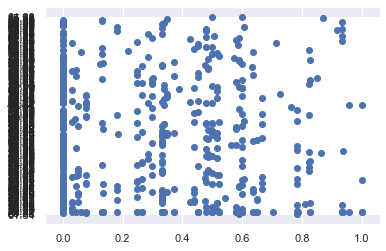

In [7]:
# sat.join(frpm, left_on='Scode', right_on='School Code', how='inner')

merge = pd.merge(sat, frpm, left_on='Scode', right_on='School Code', how='inner')\
[['Percent (%) \nEligible FRPM \n(K-12)', 'PctMathBenchmark']].dropna().sample(500)

plt.scatter(merge['Percent (%) \nEligible FRPM \n(K-12)'], merge['PctMathBenchmark'])